## import libs

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


## load and show training data

In [3]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## show information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Generate Descriptive Statistics

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Compute pairwise correlation of columns

In [6]:
coormat = data.corr()
print(coormat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


## show correation between `Sex` and `Survived`

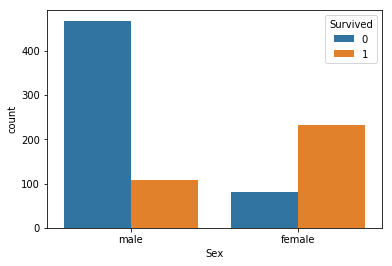

In [7]:
sns.countplot('Sex', data=data, hue='Survived')

## show relations between `Pclass` and `Sex`

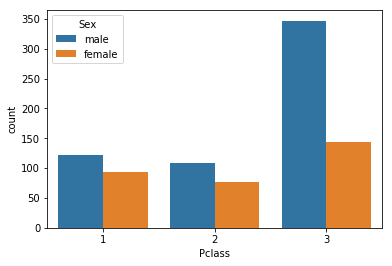

In [8]:
sns.countplot('Pclass', data=data, hue='Sex')

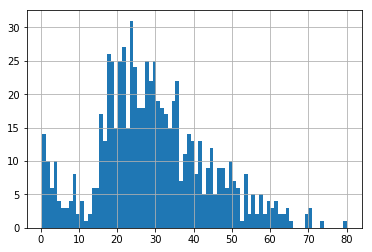

In [18]:
data['Age'].hist(bins=80)

## Point Plot
see https://seaborn.pydata.org/generated/seaborn.pointplot.html

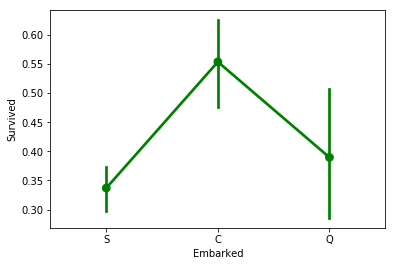

In [19]:
sns.pointplot(x='Embarked', y='Survived', data=data, color='g')

## factorplot
see https://seaborn.pydata.org/generated/seaborn.factorplot.html

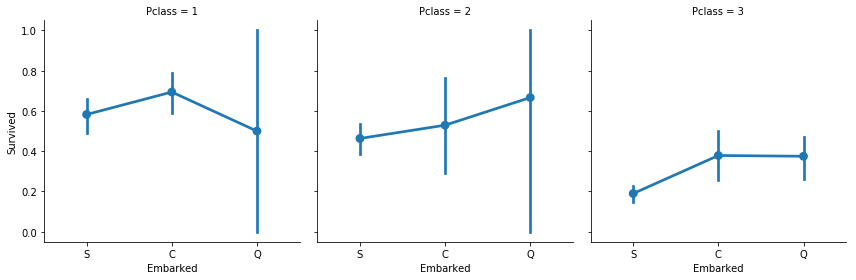

In [21]:
sns.factorplot('Embarked', 'Survived', col='Pclass', data=data)

## Modify Data

In [37]:
data.Age = data.Age.fillna(data.Age.mean())
data = data.replace('male', 0).replace('female', 1).replace('C', 0).replace('Q', 1).replace('S', 2)
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.dropna()
data.head(10)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,2.0
1,1,1,1,38.000000,1,0,71.2833,0.0
2,1,3,1,26.000000,0,0,7.9250,2.0
3,1,1,1,35.000000,1,0,53.1000,2.0
4,0,3,0,35.000000,0,0,8.0500,2.0
5,0,3,0,29.699118,0,0,8.4583,1.0
6,0,1,0,54.000000,0,0,51.8625,2.0
7,0,3,0,2.000000,3,1,21.0750,2.0
8,1,3,1,27.000000,0,2,11.1333,2.0
9,1,2,1,14.000000,1,0,30.0708,0.0


## Make male data and female data

In [39]:
male = data.drop(data.index[data.Sex==1])
male.drop(['Sex'], axis=1, inplace=True)
male.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.000000,1,0,7.2500,2.0
4,0,3,35.000000,0,0,8.0500,2.0
5,0,3,29.699118,0,0,8.4583,1.0
6,0,1,54.000000,0,0,51.8625,2.0
7,0,3,2.000000,3,1,21.0750,2.0


In [41]:
female = data.drop(data.index[data.Sex==0])
female.drop(['Sex'], axis=1, inplace=True)
female.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,0.0
2,1,3,26.0,0,0,7.9250,2.0
3,1,1,35.0,1,0,53.1000,2.0
8,1,3,27.0,0,2,11.1333,2.0
9,1,2,14.0,1,0,30.0708,0.0


In [ ]:
data['Age'].hist(bins=80)

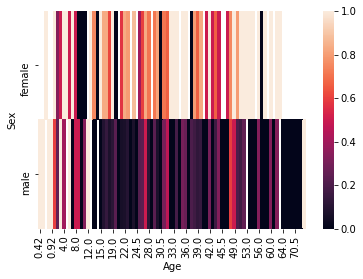

In [19]:
test = pd.pivot_table(data=data, index="Sex", columns="Age", values="Survived")
sns.heatmap(test)